Франков Олексій, ПС-4, ФКНК

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data09.csv", delimiter = ";", header = None)

Дивимось на дані

In [4]:
data.head()

0      1  2
0  0.774  0.288  1
1  0.989  0.480  1
2  0.135  0.419  0
3  0.802  0.395  1
4  0.924  0.172  1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
x = data[[0,1]]
y = data[[2]].values

Вивоимо вибірку

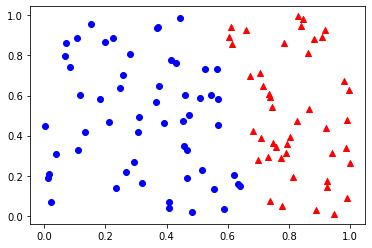

In [8]:
plt.scatter(x[y == 0][0], x[y == 0][1], color = "blue", marker = "o")
plt.scatter(x[y == 1][0], x[y == 1][1], color = "red", marker = "^")

Розділяємо вибірку на навчальну та тестову

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1) 

# Бібліотечний перцептрон

Створюємо персептрон

In [10]:
model = Perceptron()

Навчаємо модель

In [11]:
model.fit(Xtrain, ytrain.ravel())

Perceptron()

Застосовуємо на тестових даних

In [12]:
y_pred = model.predict(Xtest)

Точність персептрону sklearn

In [13]:
accuracy_score(ytest, y_pred)

0.9666666666666667

Виводимо коефіцієнти моделі

In [14]:
w = model.coef_[0]
print(f"Ваги моделі {w}")

Ваги моделі [4.295 0.428]


In [15]:
b = model.intercept_[0]
print(f"Біас моделі {b}")

Біас моделі -3.0


Будуємо графік для тестових даних

(0.0, 1.0)

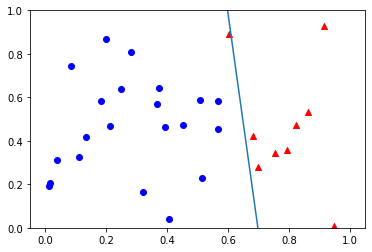

In [16]:
plt.scatter(Xtest[ytest == 0][0], Xtest[ytest == 0][1], color = "blue", marker = "o")
plt.scatter(Xtest[ytest == 1][0], Xtest[ytest == 1][1], color = "red", marker = "^")
x1 = np.linspace(0,1,100)
y_line = -w[0]/w[1] * x1 - b / w[1]
plt.plot(x1, y_line)
plt.ylim(0,1)

# Власний персептрон

In [18]:
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

class Custom_Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        X = X.values
        n_samples, n_features = X.shape

        # ініціалізація параметрів
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)

        # налаштування ваг
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # дельта правило
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        X = X.values
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

Створюємо модель

In [19]:
model2 = Custom_Perceptron(learning_rate=0.01, n_iters=100)

Навчаємо модель

In [20]:
model2.fit(Xtrain, ytrain)

Застосовуємо модель на тестових даних

In [21]:
y_pred2 = model2.predict(Xtest)

Точність власного персептрону

In [22]:
accuracy_score(ytest, y_pred2)

1.0

Виводимо коефіцієнти моделі

In [23]:
w2 = model2.weights
print(f"Ваги моделі {w2}")

Ваги моделі [0.05519 0.01149]


In [24]:
b2 = model2.bias
print(f"Біас моделі {b2}")

Біас моделі [-0.04]


Будуємо графік для тестових даних

(0.0, 1.0)

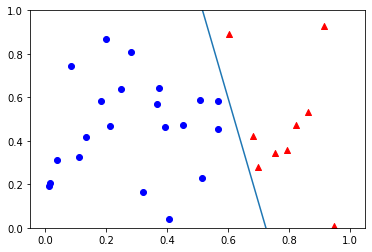

In [25]:
plt.scatter(Xtest[ytest == 0][0], Xtest[ytest == 0][1], color = "blue", marker = "o")
plt.scatter(Xtest[ytest == 1][0], Xtest[ytest == 1][1], color = "red", marker = "^")
x1 = np.linspace(0,1,100)
y_line2 = -w2[0]/w2[1] * x1 - b2 / w2[1]
plt.plot(x1, y_line2)
plt.ylim(0,1)